## LOAD LIBRARIES


In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd 
import multiprocessing
import random

from sklearn.preprocessing import scale
from sklearn.preprocessing import OneHotEncoder
import timeit
import operator
import itertools
from collections import Counter

## DATA FRAME

Firstly, a dataset will be created, containing the following variables: symptoms, direct contact with someone infected with Covid_19, exposure, protection, transport (public or private), area and interaction of the hands with the face.

In [0]:
data= pd.DataFrame()

Create variables: 'protección', 'transporte', 'contacto_directo'. Each of them will contain binary variables.

In [0]:
data['proteccion']= ['si', 'no']
data['transporte']= ['si', 'no']
data['contacto_directo'] = ['si', 'no']
data

,proteccion,transporte,contacto_directo
0,si,si,si
1,no,no,no


Create variable 'exposición'. This variable is related with the type of work condiction over confinement period. Its values are:


*   Alta: Telework.
*   Media: Working from the office.
*   Baja: Public attention.




In [0]:
data1=pd.DataFrame()

In [0]:
data1['exposicion']= ['alta', 'media', 'baja']
data1

,exposicion
0,alta
1,media
2,baja


Create variable 'síntoma', which referse to the type of symptom.

In [0]:
data2=pd.DataFrame()
data2['sintoma'] = ['fiebre', 'tos_seca', 'fatiga', 'flemas_esputos', 'dif_resp','dolor_garganta', 'dolor_cabeza', 'dolor_muscular',
                    'escalofrios', 'nausea_vomito', 'cong_nasal','diarrea', 'expect_sangre', 'conjuntivitis', 'dermatitis', 'falta_gusto_olfato']
data2

,sintoma
0,fiebre
1,tos_seca
2,fatiga
3,flemas_esputos
4,dif_resp
5,dolor_garganta
6,dolor_cabeza
7,dolor_muscular
8,escalofrios
9,nausea_vomito


data_final is created with the combination of the datasets created above.

In [0]:
lista = [data, data1, data2]
data_final = pd.concat(lista, axis=1)
data_final

,proteccion,transporte,contacto_directo,exposicion,sintoma
0,si,si,si,alta,fiebre
1,no,no,no,media,tos_seca
2,NaN,NaN,NaN,baja,fatiga
3,NaN,NaN,NaN,NaN,flemas_esputos
4,NaN,NaN,NaN,NaN,dif_resp
5,NaN,NaN,NaN,NaN,dolor_garganta
6,NaN,NaN,NaN,NaN,dolor_cabeza
7,NaN,NaN,NaN,NaN,dolor_muscular
8,NaN,NaN,NaN,NaN,escalofrios
9,NaN,NaN,NaN,NaN,nausea_vomito


Here we clean de dataset removing the NaNs. Also, total possible combinations is computed.

In [0]:
proteccion = len(data_final.proteccion.dropna().unique())
transporte = len(data_final.transporte.dropna().unique())
contacto_directo = len(data_final.contacto_directo.dropna().unique())
exposicion= len(data_final.exposicion.dropna().unique())
sintoma= len(data_final.sintoma.dropna().unique())

print("Total Combination Possible: ",proteccion * transporte * contacto_directo * exposicion * sintoma)

Total Combination Possible:  384


We define a formula that calculates and returns the power set of the set c.

In [0]:
def potencia(c):
   
    if len(c) == 0:
        return [[]]
    r = potencia(c[:-1])
    return r + [s + [c[-1]] for s in r]

def imprime_ordenado(c):
    
    for e in sorted(c, key=lambda s: (len(s), s)):
        print(e)

All symptoms combinations are created.

In [0]:
comb_sintomas=potencia(['fiebre', 'tos_seca', 'fatiga', 'flemas_esputos', 'dif_resp','dolor_garganta', 'dolor_cabeza', 'dolor_muscular',
                    'escalofrios', 'nausea_vomito', 'cong_nasal','diarrea', 'expect_sangre', 'conjuntivitis', 'dermatitis', 'falta_gusto_olfato'])

comb_sintomas

[[],
 ['fiebre'],
 ['tos_seca'],
 ['fiebre', 'tos_seca'],
 ['fatiga'],
 ['fiebre', 'fatiga'],
 ['tos_seca', 'fatiga'],
 ['fiebre', 'tos_seca', 'fatiga'],
 ['flemas_esputos'],
 ['fiebre', 'flemas_esputos'],
 ['tos_seca', 'flemas_esputos'],
 ['fiebre', 'tos_seca', 'flemas_esputos'],
 ['fatiga', 'flemas_esputos'],
 ['fiebre', 'fatiga', 'flemas_esputos'],
 ['tos_seca', 'fatiga', 'flemas_esputos'],
 ['fiebre', 'tos_seca', 'fatiga', 'flemas_esputos'],
 ['dif_resp'],
 ['fiebre', 'dif_resp'],
 ['tos_seca', 'dif_resp'],
 ['fiebre', 'tos_seca', 'dif_resp'],
 ['fatiga', 'dif_resp'],
 ['fiebre', 'fatiga', 'dif_resp'],
 ['tos_seca', 'fatiga', 'dif_resp'],
 ['fiebre', 'tos_seca', 'fatiga', 'dif_resp'],
 ['flemas_esputos', 'dif_resp'],
 ['fiebre', 'flemas_esputos', 'dif_resp'],
 ['tos_seca', 'flemas_esputos', 'dif_resp'],
 ['fiebre', 'tos_seca', 'flemas_esputos', 'dif_resp'],
 ['fatiga', 'flemas_esputos', 'dif_resp'],
 ['fiebre', 'fatiga', 'flemas_esputos', 'dif_resp'],
 ['tos_seca', 'fatiga', 'flema

We are defining a new DataFrame with the values obtained in the last step. This list contains all possible combinations of 'síntoma'. The one with no value stands for no symptoms.

In [0]:
comb_sint=comb_sintomas
comb_sint=pd.DataFrame({'sintomas': comb_sintomas})
comb_sint

,sintomas
0,[]
1,[fiebre]
2,[tos_seca]
3,"[fiebre, tos_seca]"
4,[fatiga]
...,...
65531,"[fiebre, tos_seca, flemas_esputos, dif_resp, d..."
65532,"[fatiga, flemas_esputos, dif_resp, dolor_garga..."
65533,"[fiebre, fatiga, flemas_esputos, dif_resp, dol..."
65534,"[tos_seca, fatiga, flemas_esputos, dif_resp, d..."


We link the combined symptoms with the rest of variables.

In [0]:
final_data=pd.concat([data_final, comb_sint], axis=1, sort=False)
del final_data['sintoma']
final_data

,proteccion,transporte,contacto_directo,exposicion,sintomas
0,si,si,si,alta,[]
1,no,no,no,media,[fiebre]
2,NaN,NaN,NaN,baja,[tos_seca]
3,NaN,NaN,NaN,NaN,"[fiebre, tos_seca]"
4,NaN,NaN,NaN,NaN,[fatiga]
...,...,...,...,...,...
65531,NaN,NaN,NaN,NaN,"[fiebre, tos_seca, flemas_esputos, dif_resp, d..."
65532,NaN,NaN,NaN,NaN,"[fatiga, flemas_esputos, dif_resp, dolor_garga..."
65533,NaN,NaN,NaN,NaN,"[fiebre, fatiga, flemas_esputos, dif_resp, dol..."
65534,NaN,NaN,NaN,NaN,"[tos_seca, fatiga, flemas_esputos, dif_resp, d..."


Variable "sintomas" is modified. This variable is adequated to the post application of dummies.

In [0]:
def try_join(l):
    try:
        return ','.join(map(str, l))
    except TypeError:
        return np.nan

final_data['Sintomas'] = [try_join(l) for l in final_data['sintomas']]
del final_data['sintomas']

Here we see the result after applying the formula.

In [0]:
final_data

,proteccion,transporte,contacto_directo,exposicion,Sintomas
0,si,si,si,alta,
1,no,no,no,media,fiebre
2,NaN,NaN,NaN,baja,tos_seca
3,NaN,NaN,NaN,NaN,"fiebre,tos_seca"
4,NaN,NaN,NaN,NaN,fatiga
...,...,...,...,...,...
65531,NaN,NaN,NaN,NaN,"fiebre,tos_seca,flemas_esputos,dif_resp,dolor_..."
65532,NaN,NaN,NaN,NaN,"fatiga,flemas_esputos,dif_resp,dolor_garganta,..."
65533,NaN,NaN,NaN,NaN,"fiebre,fatiga,flemas_esputos,dif_resp,dolor_ga..."
65534,NaN,NaN,NaN,NaN,"tos_seca,fatiga,flemas_esputos,dif_resp,dolor_..."


NaNs are removed. Also, total possible combination is computed. As we can see, total combinations are 65.536x2x3x2x2=1.572.864


In [0]:
proteccion = len(final_data.proteccion.dropna().unique())
transporte = len(final_data.transporte.dropna().unique())
contacto_directo = len(final_data.contacto_directo.dropna().unique())
exposicion= len(final_data.exposicion.dropna().unique())
sintomas= len(final_data.Sintomas.dropna().unique())


print("Total Combination Possible: ",proteccion * transporte * contacto_directo * exposicion * sintomas)

Total Combination Possible:  1572864


Now, let's convert the series we created into list.

In [0]:
columns = [final_data.proteccion.dropna().unique().tolist(),
          final_data.transporte.dropna().unique().tolist(),
          final_data.contacto_directo.dropna().unique().tolist(),
          final_data.exposicion.dropna().unique().tolist(),
          final_data.Sintomas.dropna().unique().tolist()]

final_data2 = pd.DataFrame(list(itertools.product(*columns)), columns=final_data.columns)

As we can see, the dataset named 'final_data2' is created including all the possible combinations of the dataset's variables. Thus, the dataset 'final_data' has a total of possible combinations of 1.572.864, which is the number of rows obtained.

In [0]:
final_data2

,proteccion,transporte,contacto_directo,exposicion,Sintomas
0,si,si,si,alta,
1,si,si,si,alta,fiebre
2,si,si,si,alta,tos_seca
3,si,si,si,alta,"fiebre,tos_seca"
4,si,si,si,alta,fatiga
...,...,...,...,...,...
1572859,no,no,no,baja,"fiebre,tos_seca,flemas_esputos,dif_resp,dolor_..."
1572860,no,no,no,baja,"fatiga,flemas_esputos,dif_resp,dolor_garganta,..."
1572861,no,no,no,baja,"fiebre,fatiga,flemas_esputos,dif_resp,dolor_ga..."
1572862,no,no,no,baja,"tos_seca,fatiga,flemas_esputos,dif_resp,dolor_..."


We create a new column "zona". "zona" include the different Spanish regions. This new variable is added to the last dataset created, "final_data2".

In [0]:
zona= ['madrid', 'cataluña', 'castilla_la_mancha', 'castilla_y_leon', 'pais_vasco', 'andalucia', 'com_val', 'galicia', 'aragon', 'navarra', 'larioja',
                'extremadura', 'asturias', 'cantabria', 'canarias', 'baleares', 'murcia', 'ceuta', 'melilla']
lista=random.choices(zona, k=1572864)
final_data2['zona']=lista
final_data2

,proteccion,transporte,contacto_directo,exposicion,Sintomas,zona
0,si,si,si,alta,,navarra
1,si,si,si,alta,fiebre,castilla_la_mancha
2,si,si,si,alta,tos_seca,castilla_la_mancha
3,si,si,si,alta,"fiebre,tos_seca",navarra
4,si,si,si,alta,fatiga,castilla_la_mancha
...,...,...,...,...,...,...
1572859,no,no,no,baja,"fiebre,tos_seca,flemas_esputos,dif_resp,dolor_...",castilla_y_leon
1572860,no,no,no,baja,"fatiga,flemas_esputos,dif_resp,dolor_garganta,...",cataluña
1572861,no,no,no,baja,"fiebre,fatiga,flemas_esputos,dif_resp,dolor_ga...",castilla_la_mancha
1572862,no,no,no,baja,"tos_seca,fatiga,flemas_esputos,dif_resp,dolor_...",ceuta


Now our DataFrame has 6 columns and a total of 1.572.864 cases.

In [0]:
final_data2.shape

(1572864, 6)

Let's check the first 5 rows of the dataset "final_data2".

In [0]:
final_data2.head()

,proteccion,transporte,contacto_directo,exposicion,Sintomas,zona
0,si,si,si,alta,,navarra
1,si,si,si,alta,fiebre,castilla_la_mancha
2,si,si,si,alta,tos_seca,castilla_la_mancha
3,si,si,si,alta,"fiebre,tos_seca",navarra
4,si,si,si,alta,fatiga,castilla_la_mancha


"Sintomas" values are converted into dummies. As you can see, we cannot apply the direct dummies function because it is a list of several diseases. Thus, we use a counter.

In [0]:
sintom_list = final_data2['Sintomas'].str.split(',')

sintom_counter = Counter(([a for b in sintom_list.tolist() for a in b]))

for Sintomas in sintom_counter.keys():
    final_data2[Sintomas] = 0
    final_data2.loc[final_data2['Sintomas'].str.contains(Sintomas), Sintomas] = 1

final_data2.head()

,proteccion,transporte,contacto_directo,exposicion,Sintomas,zona,,fiebre,tos_seca,fatiga,flemas_esputos,dif_resp,dolor_garganta,dolor_cabeza,dolor_muscular,escalofrios,nausea_vomito,cong_nasal,diarrea,expect_sangre,conjuntivitis,dermatitis,falta_gusto_olfato
0,si,si,si,alta,,navarra,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,si,si,si,alta,fiebre,castilla_la_mancha,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,si,si,si,alta,tos_seca,castilla_la_mancha,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,si,si,si,alta,"fiebre,tos_seca",navarra,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,si,si,si,alta,fatiga,castilla_la_mancha,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


After applying the counter to create the dummie variables, we remove variables "Sintomas" and the default column "" which randomly appears with the creation of the dummies.

In [0]:
del final_data2['']
del final_data2['Sintomas']

Check the dataset after removing the unnecessary variables.

In [0]:
final_data2

,proteccion,transporte,contacto_directo,exposicion,zona,fiebre,tos_seca,fatiga,flemas_esputos,dif_resp,dolor_garganta,dolor_cabeza,dolor_muscular,escalofrios,nausea_vomito,cong_nasal,diarrea,expect_sangre,conjuntivitis,dermatitis,falta_gusto_olfato
0,si,si,si,alta,navarra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,si,si,si,alta,castilla_la_mancha,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,si,si,si,alta,castilla_la_mancha,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,si,si,si,alta,navarra,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,si,si,si,alta,castilla_la_mancha,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1572859,no,no,no,baja,castilla_y_leon,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1
1572860,no,no,no,baja,cataluña,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1572861,no,no,no,baja,castilla_la_mancha,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1572862,no,no,no,baja,ceuta,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


We also convert "contacto directo", "exposicion", "proteccion", "transporte" and "zona" into dummies.

In [0]:
dummies = pd.get_dummies(final_data2)
final_data2 = dummies
final_data2.head()

,fiebre,tos_seca,fatiga,flemas_esputos,dif_resp,dolor_garganta,dolor_cabeza,dolor_muscular,escalofrios,nausea_vomito,cong_nasal,diarrea,expect_sangre,conjuntivitis,dermatitis,falta_gusto_olfato,proteccion_no,proteccion_si,transporte_no,transporte_si,contacto_directo_no,contacto_directo_si,exposicion_alta,exposicion_baja,exposicion_media,zona_andalucia,zona_aragon,zona_asturias,zona_baleares,zona_canarias,zona_cantabria,zona_castilla_la_mancha,zona_castilla_y_leon,zona_cataluña,zona_ceuta,zona_com_val,zona_extremadura,zona_galicia,zona_larioja,zona_madrid,zona_melilla,zona_murcia,zona_navarra,zona_pais_vasco
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
final_data2.shape

(1572864, 44)

Here we have all the variables in our Dataframe

In [0]:
final_data2.columns

Index(['fiebre', 'tos_seca', 'fatiga', 'flemas_esputos', 'dif_resp',
       'dolor_garganta', 'dolor_cabeza', 'dolor_muscular', 'escalofrios',
       'nausea_vomito', 'cong_nasal', 'diarrea', 'expect_sangre',
       'conjuntivitis', 'dermatitis', 'falta_gusto_olfato', 'proteccion_no',
       'proteccion_si', 'transporte_no', 'transporte_si',
       'contacto_directo_no', 'contacto_directo_si', 'exposicion_alta',
       'exposicion_baja', 'exposicion_media', 'zona_andalucia', 'zona_aragon',
       'zona_asturias', 'zona_baleares', 'zona_canarias', 'zona_cantabria',
       'zona_castilla_la_mancha', 'zona_castilla_y_leon', 'zona_cataluña',
       'zona_ceuta', 'zona_com_val', 'zona_extremadura', 'zona_galicia',
       'zona_larioja', 'zona_madrid', 'zona_melilla', 'zona_murcia',
       'zona_navarra', 'zona_pais_vasco'],
      dtype='object')

## APPLY PROBABILITY OF INITIAL CONTAGION FUCTION

Now let's give each of those variables a weight to compute the contagion.

Definition of variables:

*   a1 to a16: symptoms.
https://www.mscbs.gob.es/profesionales/saludPublica/ccayes/alertasActual/nCov-China/documentos/20200417_ITCoronavirus.pdf pag 19

*   b1, c2, e1, e2, e3: life style.
b= proteccion
c= transporte publico
e=exposicion

*   f1 to f19: region.
"https://github.com/datadista/datasets/blob/master/COVID%2019/ccaa_covid19_datos_isciii.csv"
Casos activos= PCR-Fallecidos- Recuperados
Ministerto de Sanidad

*   d2: contacto_directo_si.


We are not including in this formula b2 (proteccion_si), c1 (transporte_no), and d1 (contacto_directo_no) because these are binary variables. Thus, we include the contrary variables.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Likewise, one of the parameters that we will use to calculate the initial probability is the risk rate by region, a data that will be embedded directly from the database.

In [0]:
current_risk_by_region=pd.read_csv('/content/drive/My Drive/Risk_by_region.csv')
current_risk_by_region

Likewise, one of the parameters that we will use to calculate the initial probability is the risk rate by region, a data that will be embedded directly from the database.

In [0]:
def infection (a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,b1,b2,c1,c2,d1,d2,e1,e2,e3,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19): 

    # SYMPTOMATOLOGY = symptom n * weight n
    síntomas = [a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16]
    peso_por_síntoma = [27.95,21.53,12.11,10.62,5.91,4.42,4.32,4.71,3.62,1.59,1.53,1.18,0.29,0.22,0,0]
    peso_total_síntomas = list(map(operator.mul, síntomas, peso_por_síntoma))
    sintomatologia=sum(peso_total_síntomas)

    # LIFE STYLE = Protección no + Transporte sí + exposición baja + exposición media + exposición alta
    variables_estilo_de_vida=[b1,c2,e1,e2,e3]  
    peso_estilo_de_vida=[15,15,17.5,35,70]
    peso_total_estilo_de_vida = list(map(operator.mul, variables_estilo_de_vida, peso_estilo_de_vida))
    estilo_de_vida=sum(peso_total_estilo_de_vida)

    # RISK ZONE = region n * weight n
    CCAA=[f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19]    
    peso_por_CCAA = [26.71,11.60,6.78,2.16,3.70,3.28,47.71,47.30,100,0.06,15.52,4.75,13.75,10.71,81.95,0.11,2.22,14.10,12.96]
    peso_total_CCAA = list(map(operator.mul, CCAA, peso_por_CCAA))
    riesgo_de_zona=sum(peso_total_CCAA)

    # TOTAL CONTACT = Contacto_directo_si * 100 
    contacto_total=d2*100


    # In case of having symptoms
    if (sintomatologia >=30):         
      tasa_contagio=contacto_total*0.25+sintomatologia*0.6+estilo_de_vida*0.1+riesgo_de_zona*0.05  

    # In case of not having symptoms
    else:                             
      tasa_contagio=contacto_total*0.6+sintomatologia*0.25+estilo_de_vida*0.1+riesgo_de_zona*0.05
         
    return (tasa_contagio)


def Prob_infection_initial(): 
      
    final_data2['Prob_infection_initial'] = final_data2.apply(lambda row : infection(row['fiebre'],row['tos_seca'],row['fatiga'],row['flemas_esputos'],row['dif_resp'],
                                                                           row['dolor_garganta'],row['dolor_cabeza'],row['dolor_muscular'],row['escalofrios'],
                                                                           row['nausea_vomito'],row['cong_nasal'],row['diarrea'], row['expect_sangre'], row['conjuntivitis'],
                                                                           row['dermatitis'],row['falta_gusto_olfato'],row['proteccion_no'],
                                                                           row['proteccion_si'],row['transporte_no'],row['transporte_si'],
                                                                           row['contacto_directo_no'],row['contacto_directo_si'],row['exposicion_alta'],
                                                                           row['exposicion_baja'],row['exposicion_media'],row['zona_andalucia'],
                                                                           row['zona_aragon'],row['zona_asturias'],row['zona_baleares'],
                                                                           row['zona_canarias'],row['zona_cantabria'],row['zona_castilla_la_mancha'],
                                                                           row['zona_castilla_y_leon'],row['zona_cataluña'],row['zona_ceuta'],
                                                                           row['zona_com_val'],row['zona_extremadura'],row['zona_galicia'],
                                                                           row['zona_larioja'],row['zona_madrid'],row['zona_melilla'],
                                                                           row['zona_murcia'],row['zona_navarra'],row['zona_pais_vasco']), axis = 1) 
   
    return final_data2

In [0]:
final_data2=Prob_infection_initial()
final_data2

,fiebre,tos_seca,fatiga,flemas_esputos,dif_resp,dolor_garganta,dolor_cabeza,dolor_muscular,escalofrios,nausea_vomito,cong_nasal,diarrea,expect_sangre,conjuntivitis,dermatitis,falta_gusto_olfato,proteccion_no,proteccion_si,transporte_no,transporte_si,contacto_directo_no,contacto_directo_si,exposicion_alta,exposicion_baja,exposicion_media,zona_andalucia,zona_aragon,zona_asturias,zona_baleares,zona_canarias,zona_cantabria,zona_castilla_la_mancha,zona_castilla_y_leon,zona_cataluña,zona_ceuta,zona_com_val,zona_extremadura,zona_galicia,zona_larioja,zona_madrid,zona_melilla,zona_murcia,zona_navarra,zona_pais_vasco,Prob_infection_initial
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,63.9550
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,72.6230
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,71.0180
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,58.6430
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,68.6630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1572859,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,60.0990
1572860,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,40.3120
1572861,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,54.4675
1572862,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,48.2330


In [0]:
def sympotm (a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16): 

    # SYMPTOMATOLOGY = symptom n * weight n
    síntomas = [a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16]
    peso_por_síntoma = [27.95,21.53,12.11,10.62,5.91,4.42,4.32,4.71,3.62,1.59,1.53,1.18,0.29,0.22,0,0]
    peso_total_síntomas = list(map(operator.mul, síntomas, peso_por_síntoma))
    sintomatologia=sum(peso_total_síntomas)

    return (sintomatologia)

def Prob_sintomatologia(): 
      
    final_data2['Prob_sintomatologia'] = final_data2.apply(lambda row : sympotm(row['fiebre'],row['tos_seca'],row['fatiga'],row['flemas_esputos'],row['dif_resp'],
                                                                           row['dolor_garganta'],row['dolor_cabeza'],row['dolor_muscular'],row['escalofrios'],
                                                                           row['nausea_vomito'],row['cong_nasal'],row['diarrea'], row['expect_sangre'], row['conjuntivitis'],
                                                                           row['dermatitis'],row['falta_gusto_olfato']), axis = 1) 
    return final_data2

In [0]:
final_data2=Prob_sintomatologia()

We include in the "final_data2" the variable "Prob_infection_initial" containing the probability of infection.

Add an id to all records in the generated dataset.

In [0]:
final_data2['user_id']=range(0,1572864)
final_data2

,fiebre,tos_seca,fatiga,flemas_esputos,dif_resp,dolor_garganta,dolor_cabeza,dolor_muscular,escalofrios,nausea_vomito,cong_nasal,diarrea,expect_sangre,conjuntivitis,dermatitis,falta_gusto_olfato,proteccion_no,proteccion_si,transporte_no,transporte_si,contacto_directo_no,contacto_directo_si,exposicion_alta,exposicion_baja,exposicion_media,zona_andalucia,zona_aragon,zona_asturias,zona_baleares,zona_canarias,zona_cantabria,zona_castilla_la_mancha,zona_castilla_y_leon,zona_cataluña,zona_ceuta,zona_com_val,zona_extremadura,zona_galicia,zona_larioja,zona_madrid,zona_melilla,zona_murcia,zona_navarra,zona_pais_vasco,Prob_infection_initial,Prob_sintomatologia,user_id
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,63.9550,0.00,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,72.6230,27.95,1
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,71.0180,21.53,2
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,58.6430,49.48,3
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,68.6630,12.11,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1572859,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,60.0990,87.89,1572859
1572860,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,40.3120,50.52,1572860
1572861,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,54.4675,78.47,1572861
1572862,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,48.2330,72.05,1572862


## BLUETOOTH CONTACT

Generate all the registered id's and random data of the id's the user has crossed with. To avoind interactions with same id, we create three datasets with the following ranges: 0-500.000, 500.001-1.000.001, 1.000.001-1.572.864.

"user_id" range from 0 to 500.001.

In [0]:
df_contact1=pd.DataFrame()
df_contact1['user_id']=range(0,500001)
df_contact1['id_others'] = np.random.randint(500001,1000000,size=(500001, 1))
df_contact1

,user_id,id_others
0,0,814006
1,1,760669
2,2,886518
3,3,564835
4,4,861729
...,...,...
499996,499996,736894
499997,499997,834402
499998,499998,636196
499999,499999,620753


"user_id" range from 500.001 to 1.000.001.

In [0]:
df_contact2=pd.DataFrame()
df_contact2['user_id']=range(500001, 1000001)
df_contact2['id_others'] = np.random.randint(1000001,1572864,size=(500000, 1))
df_contact2['id_others'].describe()
df_contact2

,user_id,id_others
0,500001,1126943
1,500002,1261225
2,500003,1019522
3,500004,1352047
4,500005,1177632
...,...,...
499995,999996,1541734
499996,999997,1304245
499997,999998,1096714
499998,999999,1112401


"user_id" range from 1.000.001 to 1.572.864.

In [0]:
df_contact3=pd.DataFrame()
df_contact3['user_id']=range(1000001,1572864)
df_contact3['id_others'] = np.random.randint(0,500000,size=(572863, 1))
df_contact3['id_others'].describe()
df_contact2

,user_id,id_others
0,500001,1126943
1,500002,1261225
2,500003,1019522
3,500004,1352047
4,500005,1177632
...,...,...
499995,999996,1541734
499996,999997,1304245
499997,999998,1096714
499998,999999,1112401


Here we combine in the same dataset the interactions between the users created above.

In [0]:
df_contact=df_contact1.append(df_contact2)
df_contact

,user_id,id_others
0,0,814006
1,1,760669
2,2,886518
3,3,564835
4,4,861729
...,...,...
499995,999996,1541734
499996,999997,1304245
499997,999998,1096714
499998,999999,1112401


Here we combine the dataset created above with the dataset with the last range and we obtain the final dataset with all possible random interactions "df_contact".

In [0]:
df_contact=df_contact.append(df_contact3)
df_contact

,user_id,id_others
0,0,814006
1,1,760669
2,2,886518
3,3,564835
4,4,861729
...,...,...
572858,1572859,496743
572859,1572860,216895
572860,1572861,331004
572861,1572862,303558


We are giving each id_others its probability of initial infection.

In [0]:
df_prob=pd.DataFrame()
df_prob['Prob_infection_initial']= final_data2['Prob_infection_initial']
df_prob['prob_sintomas']= final_data2['Prob_sintomatologia']
df_prob['id_others']= final_data2['user_id']
df_prob

,Prob_infection_initial,prob_sintomas,id_others
0,63.9550,0.00,0
1,72.6230,27.95,1
2,71.0180,21.53,2
3,58.6430,49.48,3
4,68.6630,12.11,4
...,...,...,...
1572859,60.0990,87.89,1572859
1572860,40.3120,50.52,1572860
1572861,54.4675,78.47,1572861
1572862,48.2330,72.05,1572862


Here variable names are edited. We are changing positions to considerate that not only "user_id" interacts with "id_others, "id_others" is also interacting with "user_id". We are creating a dataset based on all possible interactions with its infection probability.

In [0]:
df_contact2= df_contact.rename(columns={'user_id':'id_others','id_others':'user_id'})
df_contact2

,id_others,user_id
0,0,814006
1,1,760669
2,2,886518
3,3,564835
4,4,861729
...,...,...
572858,1572859,496743
572859,1572860,216895
572860,1572861,331004
572861,1572862,303558


In [0]:
df_contact=df_contact.append(df_contact2)
df_contact

,user_id,id_others
0,0,814006
1,1,760669
2,2,886518
3,3,564835
4,4,861729
...,...,...
572858,496743,1572859
572859,216895,1572860
572860,331004,1572861
572861,303558,1572862


In [0]:
df_contact_prob_final=pd.DataFrame()

Finally, a dataset containing the interaction between ids and the infection probability of id_others is created.

In [0]:
df_contact_prob_final = pd.merge(df_contact, df_prob, on='id_others')
df_contact_prob_final

,user_id,id_others,Prob_infection_initial,prob_sintomas
0,0,814006,63.6115,55.29
1,1184447,814006,63.6115,55.29
2,1,760669,44.8300,67.59
3,49382,760669,44.8300,67.59
4,297496,760669,44.8300,67.59
...,...,...,...,...
3145723,437551,1572854,42.5455,61.43
3145724,326568,1572857,45.0535,66.36
3145725,432577,1572858,45.0615,59.94
3145726,331004,1572861,54.4675,78.47


Here we set the possible interactions between two random id s and extract the probability of infecton of the "id_other". Plus, "user_id" is set in ascending order.

In [0]:
df_contact_prob_final= df_contact_prob_final.sort_values(by='user_id', ascending= True)
df_contact_prob_final

,user_id,id_others,Prob_infection_initial,prob_sintomas
0,0,814006,63.6115,55.29
1004856,0,1338650,57.4140,44.61
2,1,760669,44.8300,67.59
2951577,1,1107801,44.1435,55.76
1070712,1,1353651,73.5755,71.48
...,...,...,...,...
2089395,1572862,303558,36.9415,46.51
596793,1572862,957099,75.1115,72.29
2864027,1572862,883813,66.7920,52.02
2847258,1572862,838256,69.2130,17.42


A classification depending on the infection probability of the interacted "id_others" is created as follows:


*   Green: probability of infection is classificated as low. It collects those cases which probabilities are lower than 30 in "Prob_infection_initial".
*   Orange: probability of infection is classifies as medium. It collects those cases which probabilities are between 30 and 65 in "Prob_infection_initial".
*   Red: probability of infection is classificated as high. It collects those cases which probabilities are higher than 65 in "Prob_infection_initial".


In [0]:
df_contact_prob_final.loc[df_contact_prob_final['Prob_infection_initial'] <= 30, 'State'] = 'Green' 
df_contact_prob_final.loc[(df_contact_prob_final['Prob_infection_initial'] >30) & (df_contact_prob_final['prob_sintomas'] <30), 'State'] = 'Orange' 
df_contact_prob_final.loc[(df_contact_prob_final['Prob_infection_initial'] > 30) & (df_contact_prob_final['prob_sintomas'] >=30), 'State'] = 'Red'
df_contact_prob_final

,user_id,id_others,Prob_infection_initial,prob_sintomas,State
0,0,814006,63.6115,55.29,Red
1004856,0,1338650,57.4140,44.61,Red
2,1,760669,44.8300,67.59,Red
2951577,1,1107801,44.1435,55.76,Red
1070712,1,1353651,73.5755,71.48,Red
...,...,...,...,...,...
2089395,1572862,303558,36.9415,46.51,Red
596793,1572862,957099,75.1115,72.29,Red
2864027,1572862,883813,66.7920,52.02,Red
2847258,1572862,838256,69.2130,17.42,Orange


As you can see below, we can extract those interactions with the indicated "State". In this case, we would like to extract those interactions with ids classified as "Orange".

In [0]:
orange=df_contact_prob_final[df_contact_prob_final['State']=='Orange']
red=df_contact_prob_final[df_contact_prob_final['State']=='Red']
orange

,user_id,id_others,Prob_infection_initial,prob_sintomas,State
18,6,977986,76.0600,28.78,Orange
37,13,912168,75.5975,21.65,Orange
39,14,874032,78.4350,13.74,Orange
77,27,522424,74.4175,27.35,Orange
879954,27,1353032,70.3150,20.31,Orange
...,...,...,...,...,...
627807,1572841,892176,73.1380,12.53,Orange
2416810,1572845,420108,69.2675,27.75,Orange
1677013,1572853,2980,70.7375,27.63,Orange
330370,1572860,528936,67.8410,16.92,Orange


Here extract "Red" state.

In [0]:
red

,user_id,id_others,Prob_infection_initial,prob_sintomas,State
0,0,814006,63.6115,55.29,Red
1004856,0,1338650,57.4140,44.61,Red
2,1,760669,44.8300,67.59,Red
2951577,1,1107801,44.1435,55.76,Red
1070712,1,1353651,73.5755,71.48,Red
...,...,...,...,...,...
1673948,1572861,331004,35.9775,44.80,Red
2089395,1572862,303558,36.9415,46.51,Red
596793,1572862,957099,75.1115,72.29,Red
2864027,1572862,883813,66.7920,52.02,Red


Here extract "Green" state.

In [0]:
green=df_contact_prob_final[df_contact_prob_final['State']=='Green']
green

,user_id,id_others,Prob_infection_initial,prob_sintomas,State
2949823,9,1103668,17.9475,29.47,Green
27,9,751976,12.0530,24.67,Green
34,12,692332,26.1640,31.76,Green
1296762,14,1166562,29.7620,37.69,Green
45,16,997024,7.9430,12.76,Green
...,...,...,...,...,...
6584,1572829,595232,4.4000,9.86,Green
346933,1572834,730964,11.6010,29.30,Green
2195400,1572835,381344,9.5955,13.04,Green
30321,1572849,990680,24.8340,32.18,Green


Sigmoid function is applied. It makes the probability of infection adjust to the model. Highest probability, which means higher number of interactions, will get closer to 1 (which stands for highest probability of infection). The function is defined:

In [0]:
# Function to add 
def Ro_o(n): 
    return (1/(1+2.4**-n)*0.45)*100
def Ro_r(n): 
    return (1/(1+2.4**-n)*0.55)*100
  
def main_orange(): 
      
    # We group the data before applying the formula 
    orange1 = orange.groupby(by='user_id', as_index=False).agg({'State': pd.Series.count})
      
    orange1['Ro_o'] = orange1.apply(lambda row : Ro_o(row['State']), axis = 1) 
   
    return orange1

def main_red(): 
      
    # three fields each 
    red1 = red.groupby(by='user_id', as_index=False).agg({'State': pd.Series.count})

    red1['Ro_r'] = red1.apply(lambda row : Ro_r(row['State']), axis = 1) 
   
    return red1

if __name__ == '__main__': 
    main_red()
    main_orange()

We create a new dataset that compiles in "State" variable the number of interactions with "other_id" with the indicated state (gree, orange or red).


In [0]:
contacts_r=main_red()
contacts_o=main_orange()
contacts_r

,user_id,State,Ro_r
0,0,2,46.863905
1,1,3,51.289800
2,2,1,38.823529
3,3,1,38.823529
4,4,2,46.863905
...,...,...,...
1392735,1572859,2,46.863905
1392736,1572860,1,38.823529
1392737,1572861,1,38.823529
1392738,1572862,3,51.289800


In the following dataset we include variable "State_x" and "State_y" to count the number of interactions with reds (State_x) and the number of interactions with oranges (State_y).

In [0]:
contacts_t=pd.merge(contacts_r, contacts_o, on= 'user_id', how="outer")
contacts_t

,user_id,State_x,Ro_r,State_y,Ro_o
0,0,2.0,46.863905,NaN,NaN
1,1,3.0,51.289800,NaN,NaN
2,2,1.0,38.823529,NaN,NaN
3,3,1.0,38.823529,NaN,NaN
4,4,2.0,46.863905,NaN,NaN
...,...,...,...,...,...
1471626,1572756,NaN,NaN,1.0,31.764706
1471627,1572784,NaN,NaN,1.0,31.764706
1471628,1572821,NaN,NaN,1.0,31.764706
1471629,1572823,NaN,NaN,1.0,31.764706


NaN values are changed by 0 in the dataset "contacts_t".

In [0]:
contacts_t=contacts_t.fillna(0)
contacts_t

,user_id,State_x,Ro_r,State_y,Ro_o
0,0,2.0,46.863905,0.0,0.000000
1,1,3.0,51.289800,0.0,0.000000
2,2,1.0,38.823529,0.0,0.000000
3,3,1.0,38.823529,0.0,0.000000
4,4,2.0,46.863905,0.0,0.000000
...,...,...,...,...,...
1471626,1572756,0.0,0.000000,1.0,31.764706
1471627,1572784,0.0,0.000000,1.0,31.764706
1471628,1572821,0.0,0.000000,1.0,31.764706
1471629,1572823,0.0,0.000000,1.0,31.764706


Now we create a colum that adds the probability of infection of all the interactions in variable "Exposition". It adds up the probability of red contacts and orange contacts.

In [0]:
contacts_t['Exposition']=contacts_t.Ro_o+contacts_t.Ro_r
contacts_t

,user_id,State_x,Ro_r,State_y,Ro_o,Exposition
0,0,2.0,46.863905,0.0,0.000000,46.863905
1,1,3.0,51.289800,0.0,0.000000,51.289800
2,2,1.0,38.823529,0.0,0.000000,38.823529
3,3,1.0,38.823529,0.0,0.000000,38.823529
4,4,2.0,46.863905,0.0,0.000000,46.863905
...,...,...,...,...,...,...
1471626,1572756,0.0,0.000000,1.0,31.764706,31.764706
1471627,1572784,0.0,0.000000,1.0,31.764706,31.764706
1471628,1572821,0.0,0.000000,1.0,31.764706,31.764706
1471629,1572823,0.0,0.000000,1.0,31.764706,31.764706


With the following dataset the above dataset is resumed in two variables. It simply contains "user_id" and "contacto_bluetooth" that is the addition of the probability of infection caused by all the interactons done by this user.

In [0]:
exposition= pd.DataFrame()
exposition['user_id']= contacts_t['user_id']
exposition['Contacto_bluetooth']= contacts_t['Exposition']
exposition

,user_id,Contacto_bluetooth
0,0,46.863905
1,1,51.289800
2,2,38.823529
3,3,38.823529
4,4,46.863905
...,...,...
1471626,1572756,31.764706
1471627,1572784,31.764706
1471628,1572821,31.764706
1471629,1572823,31.764706


We include in the "final_data2" dataset the created "user_id" dataset.

In [0]:
final_data3=pd.merge(final_data2, exposition, on= 'user_id', how="outer")
final_data3

,fiebre,tos_seca,fatiga,flemas_esputos,dif_resp,dolor_garganta,dolor_cabeza,dolor_muscular,escalofrios,nausea_vomito,cong_nasal,diarrea,expect_sangre,conjuntivitis,dermatitis,falta_gusto_olfato,proteccion_no,proteccion_si,transporte_no,transporte_si,contacto_directo_no,contacto_directo_si,exposicion_alta,exposicion_baja,exposicion_media,zona_andalucia,zona_aragon,zona_asturias,zona_baleares,zona_canarias,zona_cantabria,zona_castilla_la_mancha,zona_castilla_y_leon,zona_cataluña,zona_ceuta,zona_com_val,zona_extremadura,zona_galicia,zona_larioja,zona_madrid,zona_melilla,zona_murcia,zona_navarra,zona_pais_vasco,Prob_infection_initial,Prob_sintomatologia,user_id,Contacto_bluetooth
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,63.9550,0.00,0,46.863905
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,72.6230,27.95,1,51.289800
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,71.0180,21.53,2,38.823529
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,58.6430,49.48,3,38.823529
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,68.6630,12.11,4,46.863905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1572859,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,60.0990,87.89,1572859,46.863905
1572860,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,40.3120,50.52,1572860,70.588235
1572861,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,54.4675,78.47,1572861,38.823529
1572862,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,48.2330,72.05,1572862,83.054506


Fill NaNs with 0 values.

In [0]:
final_data3=final_data3.fillna(0)
final_data3

,fiebre,tos_seca,fatiga,flemas_esputos,dif_resp,dolor_garganta,dolor_cabeza,dolor_muscular,escalofrios,nausea_vomito,cong_nasal,diarrea,expect_sangre,conjuntivitis,dermatitis,falta_gusto_olfato,proteccion_no,proteccion_si,transporte_no,transporte_si,contacto_directo_no,contacto_directo_si,exposicion_alta,exposicion_baja,exposicion_media,zona_andalucia,zona_aragon,zona_asturias,zona_baleares,zona_canarias,zona_cantabria,zona_castilla_la_mancha,zona_castilla_y_leon,zona_cataluña,zona_ceuta,zona_com_val,zona_extremadura,zona_galicia,zona_larioja,zona_madrid,zona_melilla,zona_murcia,zona_navarra,zona_pais_vasco,Prob_infection_initial,Prob_sintomatologia,user_id,Contacto_bluetooth
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,63.9550,0.00,0,46.863905
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,72.6230,27.95,1,51.289800
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,71.0180,21.53,2,38.823529
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,58.6430,49.48,3,38.823529
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,68.6630,12.11,4,46.863905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1572859,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,60.0990,87.89,1572859,46.863905
1572860,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,40.3120,50.52,1572860,70.588235
1572861,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,54.4675,78.47,1572861,38.823529
1572862,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,48.2330,72.05,1572862,83.054506


To check the total comuns in "final_data3"

In [0]:
final_data3.columns

Index(['fiebre', 'tos_seca', 'fatiga', 'flemas_esputos', 'dif_resp',
       'dolor_garganta', 'dolor_cabeza', 'dolor_muscular', 'escalofrios',
       'nausea_vomito', 'cong_nasal', 'diarrea', 'expect_sangre',
       'conjuntivitis', 'dermatitis', 'falta_gusto_olfato', 'proteccion_no',
       'proteccion_si', 'transporte_no', 'transporte_si',
       'contacto_directo_no', 'contacto_directo_si', 'exposicion_alta',
       'exposicion_baja', 'exposicion_media', 'zona_andalucia', 'zona_aragon',
       'zona_asturias', 'zona_baleares', 'zona_canarias', 'zona_cantabria',
       'zona_castilla_la_mancha', 'zona_castilla_y_leon', 'zona_cataluña',
       'zona_ceuta', 'zona_com_val', 'zona_extremadura', 'zona_galicia',
       'zona_larioja', 'zona_madrid', 'zona_melilla', 'zona_murcia',
       'zona_navarra', 'zona_pais_vasco', 'Prob_infection_initial',
       'Prob_sintomatologia', 'user_id', 'Contacto_bluetooth'],
      dtype='object')

"final_data3" variables are ordered.

Show data.

In [0]:
final_data3

,fiebre,tos_seca,fatiga,flemas_esputos,dif_resp,dolor_garganta,dolor_cabeza,dolor_muscular,escalofrios,nausea_vomito,cong_nasal,diarrea,expect_sangre,conjuntivitis,dermatitis,falta_gusto_olfato,proteccion_no,proteccion_si,transporte_no,transporte_si,contacto_directo_no,contacto_directo_si,exposicion_alta,exposicion_baja,exposicion_media,zona_andalucia,zona_aragon,zona_asturias,zona_baleares,zona_canarias,zona_cantabria,zona_castilla_la_mancha,zona_castilla_y_leon,zona_cataluña,zona_ceuta,zona_com_val,zona_extremadura,zona_galicia,zona_larioja,zona_madrid,zona_melilla,zona_murcia,zona_navarra,zona_pais_vasco,Prob_infection_initial,Prob_sintomatologia,user_id,Contacto_bluetooth
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,63.9550,0.00,0,46.863905
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,72.6230,27.95,1,51.289800
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,71.0180,21.53,2,38.823529
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,58.6430,49.48,3,38.823529
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,68.6630,12.11,4,46.863905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1572859,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,60.0990,87.89,1572859,46.863905
1572860,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,40.3120,50.52,1572860,70.588235
1572861,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,54.4675,78.47,1572861,38.823529
1572862,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,48.2330,72.05,1572862,83.054506


## ADD IMAGE DETECTION

We also have considered that the interaction of users hands with their face are important, because it increase the probability of infection. Thus, we include this variables into the model.

We defined this function to give values of interaction of the hands with the face. "0" means there is no interaction, while "1" indicates interaction. 

In [0]:
def rand_bin_array(K, N):
    arr = np.zeros(N)
    arr[:K]  = 1
    np.random.shuffle(arr)
    return arr

In this dataset we want a higher number of no interactions than interactions. Thus, 78.643 stands for the number of users that have some interaction with the face. 

In [0]:
df_gestos_de_peligrosidad=pd.DataFrame()
df_gestos_de_peligrosidad['user_id']=range(0,1572864)
df_gestos_de_peligrosidad['gestos_de_peligrosidad']=rand_bin_array(78643,1572864) #Assuming that a random 5% of significant hazard gestures will be recorded from the total number of records 1572864 * 0.05 = 78643
df_gestos_de_peligrosidad

,user_id,gestos_de_peligrosidad
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0
...,...,...
1572859,1572859,0.0
1572860,1572860,0.0
1572861,1572861,0.0
1572862,1572862,0.0


"df_gestos_de_peligrosidad" dataset is added to "final_data3".

In [0]:
final_data3 = pd.merge(final_data3, df_gestos_de_peligrosidad, on='user_id')
final_data3

,fiebre,tos_seca,fatiga,flemas_esputos,dif_resp,dolor_garganta,dolor_cabeza,dolor_muscular,escalofrios,nausea_vomito,cong_nasal,diarrea,expect_sangre,conjuntivitis,dermatitis,falta_gusto_olfato,proteccion_no,proteccion_si,transporte_no,transporte_si,contacto_directo_no,contacto_directo_si,exposicion_alta,exposicion_baja,exposicion_media,zona_andalucia,zona_aragon,zona_asturias,zona_baleares,zona_canarias,zona_cantabria,zona_castilla_la_mancha,zona_castilla_y_leon,zona_cataluña,zona_ceuta,zona_com_val,zona_extremadura,zona_galicia,zona_larioja,zona_madrid,zona_melilla,zona_murcia,zona_navarra,zona_pais_vasco,Prob_infection_initial,Prob_sintomatologia,user_id,Contacto_bluetooth,gestos_de_peligrosidad
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,63.9550,0.00,0,46.863905,0.0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,72.6230,27.95,1,51.289800,0.0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,71.0180,21.53,2,38.823529,0.0
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,58.6430,49.48,3,38.823529,0.0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,68.6630,12.11,4,46.863905,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1572859,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,60.0990,87.89,1572859,46.863905,0.0
1572860,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,40.3120,50.52,1572860,70.588235,0.0
1572861,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,54.4675,78.47,1572861,38.823529,0.0
1572862,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,48.2330,72.05,1572862,83.054506,0.0



## ADD SOUND DETECTION

Sound detection is also important to catch the sound of cough. We consider that this variable can add value to the infection model because we can detect the cough's symptoms.

In this dataset we want a higher number of no cough. Thus, 78.643 stands for the number of users that cough.

In [0]:
df_tos_detectada=pd.DataFrame()
df_tos_detectada['user_id']=range(0,1572864)
df_tos_detectada['tos_detectada']=rand_bin_array(78643,1572864) #Assuming that a significant 5% of the total number of detected coughs will be randomly recorded 1572864 * 0.05 = 78643
df_tos_detectada

,user_id,tos_detectada
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0
...,...,...
1572859,1572859,0.0
1572860,1572860,0.0
1572861,1572861,0.0
1572862,1572862,0.0


"df_tos_detectada" is included in "final_data3" dataset.

In [0]:
final_data3 = pd.merge(final_data3, df_tos_detectada, on='user_id')
final_data3

,fiebre,tos_seca,fatiga,flemas_esputos,dif_resp,dolor_garganta,dolor_cabeza,dolor_muscular,escalofrios,nausea_vomito,cong_nasal,diarrea,expect_sangre,conjuntivitis,dermatitis,falta_gusto_olfato,proteccion_no,proteccion_si,transporte_no,transporte_si,contacto_directo_no,contacto_directo_si,exposicion_alta,exposicion_baja,exposicion_media,zona_andalucia,zona_aragon,zona_asturias,zona_baleares,zona_canarias,zona_cantabria,zona_castilla_la_mancha,zona_castilla_y_leon,zona_cataluña,zona_ceuta,zona_com_val,zona_extremadura,zona_galicia,zona_larioja,zona_madrid,zona_melilla,zona_murcia,zona_navarra,zona_pais_vasco,Prob_infection_initial,Prob_sintomatologia,user_id,Contacto_bluetooth,gestos_de_peligrosidad,tos_detectada
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,63.9550,0.00,0,46.863905,0.0,0.0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,72.6230,27.95,1,51.289800,0.0,0.0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,71.0180,21.53,2,38.823529,0.0,0.0
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,58.6430,49.48,3,38.823529,0.0,0.0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,68.6630,12.11,4,46.863905,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1572859,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,60.0990,87.89,1572859,46.863905,0.0,0.0
1572860,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,40.3120,50.52,1572860,70.588235,0.0,0.0
1572861,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,54.4675,78.47,1572861,38.823529,0.0,0.0
1572862,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,48.2330,72.05,1572862,83.054506,0.0,0.0


## DATA QUALITY

At this point, let's check the quality of the created dataset.

In [0]:
final_data3.shape

(1572864, 50)

Let's check "final_data" after applying these modifications.Check the first 5 lines of our new dataset.

In [0]:
final_data3.head(5)

,fiebre,tos_seca,fatiga,flemas_esputos,dif_resp,dolor_garganta,dolor_cabeza,dolor_muscular,escalofrios,nausea_vomito,cong_nasal,diarrea,expect_sangre,conjuntivitis,dermatitis,falta_gusto_olfato,proteccion_no,proteccion_si,transporte_no,transporte_si,contacto_directo_no,contacto_directo_si,exposicion_alta,exposicion_baja,exposicion_media,zona_andalucia,zona_aragon,zona_asturias,zona_baleares,zona_canarias,zona_cantabria,zona_castilla_la_mancha,zona_castilla_y_leon,zona_cataluña,zona_ceuta,zona_com_val,zona_extremadura,zona_galicia,zona_larioja,zona_madrid,zona_melilla,zona_murcia,zona_navarra,zona_pais_vasco,Prob_infection_initial,Prob_sintomatologia,user_id,Contacto_bluetooth,gestos_de_peligrosidad,tos_detectada
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,63.955,0.00,0,46.863905,0.0,0.0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,72.623,27.95,1,51.289800,0.0,0.0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,71.018,21.53,2,38.823529,0.0,0.0
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,58.643,49.48,3,38.823529,0.0,0.0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,68.663,12.11,4,46.863905,0.0,0.0


Check the last 5 lines of the dataset.

In [0]:
final_data3.tail(5)

,fiebre,tos_seca,fatiga,flemas_esputos,dif_resp,dolor_garganta,dolor_cabeza,dolor_muscular,escalofrios,nausea_vomito,cong_nasal,diarrea,expect_sangre,conjuntivitis,dermatitis,falta_gusto_olfato,proteccion_no,proteccion_si,transporte_no,transporte_si,contacto_directo_no,contacto_directo_si,exposicion_alta,exposicion_baja,exposicion_media,zona_andalucia,zona_aragon,zona_asturias,zona_baleares,zona_canarias,zona_cantabria,zona_castilla_la_mancha,zona_castilla_y_leon,zona_cataluña,zona_ceuta,zona_com_val,zona_extremadura,zona_galicia,zona_larioja,zona_madrid,zona_melilla,zona_murcia,zona_navarra,zona_pais_vasco,Prob_infection_initial,Prob_sintomatologia,user_id,Contacto_bluetooth,gestos_de_peligrosidad,tos_detectada
1572859,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,60.0990,87.89,1572859,46.863905,0.0,0.0
1572860,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,40.3120,50.52,1572860,70.588235,0.0,0.0
1572861,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,54.4675,78.47,1572861,38.823529,0.0,0.0
1572862,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,48.2330,72.05,1572862,83.054506,0.0,0.0
1572863,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,65.0030,100.00,1572863,38.823529,0.0,0.0


Observe the info of the created dataset

In [0]:
final_data3.info

<bound method DataFrame.info of          fiebre  tos_seca  ...  gestos_de_peligrosidad  tos_detectada
0             0         0  ...                     0.0            0.0
1             1         0  ...                     0.0            0.0
2             0         1  ...                     0.0            0.0
3             1         1  ...                     0.0            0.0
4             0         0  ...                     0.0            0.0
...         ...       ...  ...                     ...            ...
1572859       1         1  ...                     0.0            0.0
1572860       0         0  ...                     0.0            0.0
1572861       1         0  ...                     0.0            0.0
1572862       0         1  ...                     0.0            0.0
1572863       1         1  ...                     0.0            0.0

[1572864 rows x 50 columns]>

Dataset description.

In [0]:
description = final_data3.describe()
description

,fiebre,tos_seca,fatiga,flemas_esputos,dif_resp,dolor_garganta,dolor_cabeza,dolor_muscular,escalofrios,nausea_vomito,cong_nasal,diarrea,expect_sangre,conjuntivitis,dermatitis,falta_gusto_olfato,proteccion_no,proteccion_si,transporte_no,transporte_si,contacto_directo_no,contacto_directo_si,exposicion_alta,exposicion_baja,exposicion_media,zona_andalucia,zona_aragon,zona_asturias,zona_baleares,zona_canarias,zona_cantabria,zona_castilla_la_mancha,zona_castilla_y_leon,zona_cataluña,zona_ceuta,zona_com_val,zona_extremadura,zona_galicia,zona_larioja,zona_madrid,zona_melilla,zona_murcia,zona_navarra,zona_pais_vasco,Prob_infection_initial,Prob_sintomatologia,user_id,Contacto_bluetooth,gestos_de_peligrosidad,tos_detectada
count,1572864.0,1572864.0,1572864.0,1572864.0,1572864.0,1572864.0,1572864.0,1572864.0,1572864.0,1572864.0,1572864.0,1572864.0,1572864.0,1572864.0,1572864.0,1572864.0,1572864.0,1572864.0,1572864.0,1572864.0,1572864.0,1572864.0,1.572864e+06,1.572864e+06,1.572864e+06,1.572864e+06,1.572864e+06,1.572864e+06,1.572864e+06,1.572864e+06,1.572864e+06,1.572864e+06,1.572864e+06,1.572864e+06,1.572864e+06,1.572864e+06,1.572864e+06,1.572864e+06,1.572864e+06,1.572864e+06,1.572864e+06,1.572864e+06,1.572864e+06,1.572864e+06,1.572864e+06,1.572864e+06,1.572864e+06,1.572864e+06,1.572864e+06,1.572864e+06
mean,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,3.333333e-01,3.333333e-01,3.333333e-01,5.253410e-02,5.281576e-02,5.267970e-02,5.275981e-02,5.255063e-02,5.269750e-02,5.279668e-02,5.232239e-02,5.268478e-02,5.285454e-02,5.257289e-02,5.258179e-02,5.257479e-02,5.255572e-02,5.244128e-02,5.263583e-02,5.281194e-02,5.245845e-02,5.267143e-02,5.101823e+01,5.000000e+01,7.864315e+05,4.416414e+01,4.999987e-02,4.999987e-02
std,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,4.714047e-01,4.714047e-01,4.714047e-01,2.231016e-01,2.236656e-01,2.233933e-01,2.235537e-01,2.231347e-01,2.234290e-01,2.236274e-01,2.226764e-01,2.234035e-01,2.237431e-01,2.231793e-01,2.231972e-01,2.231831e-01,2.231449e-01,2.229153e-01,2.233055e-01,2.236579e-01,2.229497e-01,2.233768e-01,1.979426e+01,2.011834e+01,4.540469e+05,1.652470e+01,2.179448e-01,2.179448e-01
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.883000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.663600e+01,3.528500e+01,3.932158e+05,3.882353e+01,0.000000e+00,0.000000e+00
50%,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.367600e+01,5.000000e+01,7.864315e+05,4.686391e+01,0.000000e+00,0.000000e+00
75%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.735300e+01,6.471500e+01,1.1

Variable types

In [0]:
final_data3.dtypes

fiebre                       int64
tos_seca                     int64
fatiga                       int64
flemas_esputos               int64
dif_resp                     int64
dolor_garganta               int64
dolor_cabeza                 int64
dolor_muscular               int64
escalofrios                  int64
nausea_vomito                int64
cong_nasal                   int64
diarrea                      int64
expect_sangre                int64
conjuntivitis                int64
dermatitis                   int64
falta_gusto_olfato           int64
proteccion_no                uint8
proteccion_si                uint8
transporte_no                uint8
transporte_si                uint8
contacto_directo_no          uint8
contacto_directo_si          uint8
exposicion_alta              uint8
exposicion_baja              uint8
exposicion_media             uint8
zona_andalucia               uint8
zona_aragon                  uint8
zona_asturias                uint8
zona_baleares       

Analysis per variable  AQUI FALTA PONER TODAS LAS VARIABLES


In [0]:
def get_stats(group):
    return {'min': Prob.min(), 'max': Prob.max(), 'count': group.count(), 'mean': Prob.mean()}


In [0]:
df1=final_data3['fiebre'].groupby(final_data3['zona_murcia'])
df1.first()

zona_murcia
0    0
1    1
Name: fiebre, dtype: int64

In [0]:
#df2=final_data3['contacto_bluetooth'].groupby(final_data3['transporte_si'])
#df2.first()

Missing values



In [0]:
missing_values = final_data3.isnull().sum()
missing_values

fiebre                     0
tos_seca                   0
fatiga                     0
flemas_esputos             0
dif_resp                   0
dolor_garganta             0
dolor_cabeza               0
dolor_muscular             0
escalofrios                0
nausea_vomito              0
cong_nasal                 0
diarrea                    0
expect_sangre              0
conjuntivitis              0
dermatitis                 0
falta_gusto_olfato         0
proteccion_no              0
proteccion_si              0
transporte_no              0
transporte_si              0
contacto_directo_no        0
contacto_directo_si        0
exposicion_alta            0
exposicion_baja            0
exposicion_media           0
zona_andalucia             0
zona_aragon                0
zona_asturias              0
zona_baleares              0
zona_canarias              0
zona_cantabria             0
zona_castilla_la_mancha    0
zona_castilla_y_leon       0
zona_cataluña              0
zona_ceuta    

% Missing values

In [0]:
total_cells = np.product(final_data.shape)
print('Nº cells:',total_cells)
total_missing_values = missing_values.sum()
print('Nº missing values:',total_missing_values)
percentage = total_missing_values/total_cells*100
print('Percentage of total missing values:',percentage)

Nº cells: 327680
Nº missing values: 0
Percentage of total missing values: 0.0


Plots

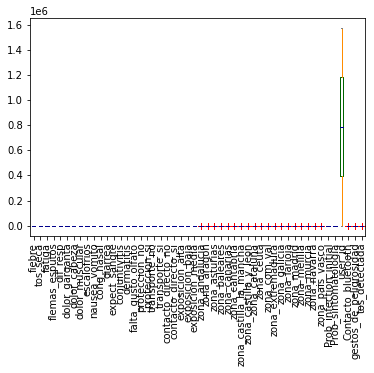

In [0]:
#Box Plot # Box = green # Wisker = orange # Median = blue # Flier = red
color = dict(boxes='DarkGreen', whiskers='DarkOrange',medians='DarkBlue', caps='Gray')
final_data3.plot(kind='box', color=color, sym='r+')
plt.xticks(rotation=90)
plt.show()

Barplot variables

In [0]:
col_names = final_data3.columns.tolist()
col_number= len(col_names)
a=0
for i in col_names:
  plt.figure(a)
  final_data3[i].value_counts().plot(kind='barh',alpha=0.5, color=['#4682B4', '#191970'], edgecolor='black')
  plt.title(i)
  a=a+1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_

Stacked Bar Chart

In [0]:
(users,y)=final_data3.shape
afirmativo= [0]*col_number
n_users= [users]*col_number
afirmativo
a=0
for i in col_names:
  afirmativo[a]=final_data3[i].sum()
  n_users[a]=n_users[a]-afirmativo[a]
  a=a+1


In [0]:
# y-axis in bold
rc('font', weight='bold')
 
# The position of the bars on the x-axis
r=[0]*col_number
for i in range(col_number):
  r[i] = i
 
# Names of group and bar width
names = col_names
barWidth = 1
 
# Create brown bars
plt.bar(r, afirmativo, color='#109DFA', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, n_users, bottom=afirmativo, color='#024A86', edgecolor='white', width=barWidth)

# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("group")
plt.xticks(rotation=90)
# Show graphic
plt.show()

Correlation matrix

Here we have the correlation between the variables of the dataset

In [0]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = final_data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

## PROBABILITY FUNTION

Now let's give each of those variables a weight to compute the contagion.

Definition of variables:

*   a1 to a16: symptoms.
https://www.mscbs.gob.es/profesionales/saludPublica/ccayes/alertasActual/nCov-China/documentos/20200417_ITCoronavirus.pdf pag 19

*   b1, c2, e1, e2, e3: life style.
b= proteccion
c= transporte publico
e=exposicion
h=gestos peligrosidad

*   f1 to f19: region.
"https://github.com/datadista/datasets/blob/master/COVID%2019/ccaa_covid19_datos_isciii.csv"
Casos activos= PCR-Fallecidos- Recuperados
Ministerto de Sanidad

*   d2: contacto_directo_si.


We are not including in this formula b2 (proteccion_si), c1 (transporte_no), and d1 (contacto_directo_no) because these are binary variables. Thus, we include the contrary variables.


In [0]:
def infection_current (a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,b1,b2,c1,c2,d1,d2,e1,e2,e3,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,g1,h1): 

    # SÍNTOMATOLOGÍA = síntoma n * peso n
    síntomas = [a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16]
    peso_por_síntoma = [27.95,21.53,12.11,10.62,5.91,4.42,4.32,4.71,3.62,1.59,1.53,1.18,0.29,0.22,0,0]
    peso_total_síntomas = list(map(operator.mul, síntomas, peso_por_síntoma))
    sintomatologia=sum(peso_total_síntomas)

    # ESTILO DE VIDA = Protección no + Transporte público sí + exposición trabajo baja + exposición trabajo media + exposición trabajo alta + gestos de peligrosidad
    variables_estilo_de_vida=[b1,c2,e1,e2,e3,h1]  
    peso_estilo_de_vida=[12.5,12.5,17.5,35,70,0.05]
    peso_total_estilo_de_vida = list(map(operator.mul, variables_estilo_de_vida, peso_estilo_de_vida))
    estilo_de_vida=sum(peso_total_estilo_de_vida)

    # ZONA DE RIESGO = CCAA n * peso n
    CCAA=[f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19]    
    peso_por_CCAA = [26.71,11.60,6.78,2.16,3.70,3.28,47.71,47.30,100,0.06,15.52,4.75,13.75,10.71,81.95,0.11,2.22,14.10,12.96]
    peso_total_CCAA = list(map(operator.mul, CCAA, peso_por_CCAA))
    riesgo_de_zona=sum(peso_total_CCAA)


    # En caso de que el usuario se cruce con más de 10 personas, la probabilidad basada en el contacto por bluetooth se define como el 100%
    if (g1>=90):
      g1=100

    # Si has tenido contacto directo con un portador del covid-19
    # CONTACTO TOTAL = Contacto directo sí * 0.8 + Contacto Bluetooth sí/no * 0.2 (contacto bluetoooth=g, falta añadir columna)
    if (d2==1):            
      contacto_total=d2*80+g1*0.20    

    # CONTACTO TOTAL = Contacto directo no * 0.2 + Contacto Bluetooth sí * 0.8 (contacto bluetoooth=g)
    else:  
      contacto_total=g1*1    
         
    # En caso de tener síntomas
    # CONTAGIO = 0.1*Contacto_total + 0.6*Síntomas + 0.2*Estilo_de_vida + 0.1*Zona_de_riesgo
    if (sintomatologia >=30):         
      tasa_contagio=contacto_total*0.25+sintomatologia*0.6+estilo_de_vida*0.1+riesgo_de_zona*0.05  

    # En caso de no tener síntomas
    # CONTAGIO = 0.6*Contacto_total + 0.15*Síntomas + 0.2*Estilo_de_vida + 0.05*Zona_de_riesgo
    else:                             
      tasa_contagio=contacto_total*0.6+sintomatologia*0.25+estilo_de_vida*0.1+riesgo_de_zona*0.05
         
    return (tasa_contagio)

def Prob_infection_current(): 
      
    final_data3['Prob_infection_current'] = final_data3.apply(lambda row : infection_current(row['fiebre'],row['tos_detectada'],row['fatiga'],row['flemas_esputos'],row['dif_resp'],
                                                                           row['dolor_garganta'],row['dolor_cabeza'],row['dolor_muscular'],row['escalofrios'],
                                                                           row['nausea_vomito'],row['cong_nasal'],row['diarrea'], row['expect_sangre'], row['conjuntivitis'],
                                                                           row['dermatitis'],row['falta_gusto_olfato'],row['proteccion_no'],
                                                                           row['proteccion_si'],row['transporte_no'],row['transporte_si'],
                                                                           row['contacto_directo_no'],row['contacto_directo_si'],row['exposicion_alta'],
                                                                           row['exposicion_baja'],row['exposicion_media'],row['zona_andalucia'],
                                                                           row['zona_aragon'],row['zona_asturias'],row['zona_baleares'],
                                                                           row['zona_canarias'],row['zona_cantabria'],row['zona_castilla_la_mancha'],
                                                                           row['zona_castilla_y_leon'],row['zona_cataluña'],row['zona_ceuta'],
                                                                           row['zona_com_val'],row['zona_extremadura'],row['zona_galicia'],
                                                                           row['zona_larioja'],row['zona_madrid'],row['zona_melilla'],
                                                                           row['zona_murcia'],row['zona_navarra'],row['zona_pais_vasco'], row['Contacto_bluetooth'],
                                                                           row['gestos_de_peligrosidad']), axis = 1) 
    
    # Se ha sustituiudo la variable tos seca por tos detectada, que es el resultado del algoritmo de audio 

    return final_data3

Show Dataset

We add to final_data3 the probability

In [0]:
final_data3=Prob_infection_current()
final_data3

,fiebre,tos_seca,fatiga,flemas_esputos,dif_resp,dolor_garganta,dolor_cabeza,dolor_muscular,escalofrios,nausea_vomito,cong_nasal,diarrea,expect_sangre,conjuntivitis,dermatitis,falta_gusto_olfato,proteccion_no,proteccion_si,transporte_no,transporte_si,contacto_directo_no,contacto_directo_si,exposicion_alta,exposicion_baja,exposicion_media,zona_andalucia,zona_aragon,zona_asturias,zona_baleares,zona_canarias,zona_cantabria,zona_castilla_la_mancha,zona_castilla_y_leon,zona_cataluña,zona_ceuta,zona_com_val,zona_extremadura,zona_galicia,zona_larioja,zona_madrid,zona_melilla,zona_murcia,zona_navarra,zona_pais_vasco,Prob_infection_initial,Prob_sintomatologia,user_id,Contacto_bluetooth,gestos_de_peligrosidad,tos_detectada,Prob_infection_current
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,63.9550,0.00,0,46.863905,0.0,0.0,57.328669
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,72.6230,27.95,1,51.289800,0.0,0.0,66.527776
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,71.0180,21.53,2,38.823529,0.0,0.0,58.044324
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,58.6430,49.48,3,38.823529,0.0,0.0,63.351324
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,68.6630,12.11,4,46.863905,0.0,0.0,62.036669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1572859,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,60.0990,87.89,1572859,46.863905,0.0,0.0,58.646976
1572860,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,40.3120,50.52,1572860,70.588235,0.0,0.0,57.709059
1572861,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,54.4675,78.47,1572861,38.823529,0.0,0.0,63.923382
1572862,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,48.2330,72.05,1572862,83.054506,0.0,0.0,55.828627


In [0]:
final_data3.columns

Index(['fiebre', 'tos_seca', 'fatiga', 'flemas_esputos', 'dif_resp',
       'dolor_garganta', 'dolor_cabeza', 'dolor_muscular', 'escalofrios',
       'nausea_vomito', 'cong_nasal', 'diarrea', 'expect_sangre',
       'conjuntivitis', 'dermatitis', 'falta_gusto_olfato', 'proteccion_no',
       'proteccion_si', 'transporte_no', 'transporte_si',
       'contacto_directo_no', 'contacto_directo_si', 'exposicion_alta',
       'exposicion_baja', 'exposicion_media', 'zona_andalucia', 'zona_aragon',
       'zona_asturias', 'zona_baleares', 'zona_canarias', 'zona_cantabria',
       'zona_castilla_la_mancha', 'zona_castilla_y_leon', 'zona_cataluña',
       'zona_ceuta', 'zona_com_val', 'zona_extremadura', 'zona_galicia',
       'zona_larioja', 'zona_madrid', 'zona_melilla', 'zona_murcia',
       'zona_navarra', 'zona_pais_vasco', 'Prob_infection_initial',
       'Prob_sintomatologia', 'user_id', 'Contacto_bluetooth',
       'gestos_de_peligrosidad', 'tos_detectada', 'Prob_infection_current'],
    

In [0]:
final_data3['Prob_infection_current'].describe()

count    1.572864e+06
mean     5.248793e+01
std      1.212980e+01
min      1.758000e+00
25%      4.358338e+01
50%      5.352518e+01
75%      6.223378e+01
max      9.501718e+01
Name: Prob_infection_current, dtype: float64

In [0]:
def sympotm (a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16): 

    # SYMPTOMATOLOGY = symptom n * weight n
    síntomas = [a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16]
    peso_por_síntoma = [27.95,21.53,12.11,10.62,5.91,4.42,4.32,4.71,3.62,1.59,1.53,1.18,0.29,0.22,0,0]
    peso_total_síntomas = list(map(operator.mul, síntomas, peso_por_síntoma))
    sintomatologia=sum(peso_total_síntomas)

    return (sintomatologia)

def Prob_sintomatologia(): 
      
    final_data3['Prob_sintomatologia'] = final_data3.apply(lambda row : sympotm(row['fiebre'],row['tos_detectada'],row['fatiga'],row['flemas_esputos'],row['dif_resp'],
                                                                           row['dolor_garganta'],row['dolor_cabeza'],row['dolor_muscular'],row['escalofrios'],
                                                                           row['nausea_vomito'],row['cong_nasal'],row['diarrea'], row['expect_sangre'], row['conjuntivitis'],
                                                                           row['dermatitis'],row['falta_gusto_olfato']), axis = 1) 
    return final_data3

In [0]:
final_data3=Prob_sintomatologia()

We clasificate the probability between "Negative", "Quarantine" and "Positive"

In [0]:
final_data3.loc[final_data3['Prob_infection_current'] >30 & (final_data3['Prob_sintomatologia'] >=30), 'Classification'] = 'Sospechoso_con_sintomas' 
final_data3.loc[(final_data3['Prob_infection_current'] >30) & (final_data3['Prob_sintomatologia'] <30), 'Classification'] = 'Sospechoso_sin_sintomas'  
final_data3.loc[final_data3['Prob_infection_current'] <= 30, 'Classification'] = 'No sospechoso' 

We show final_data3

In [0]:
final_data3

,fiebre,tos_seca,fatiga,flemas_esputos,dif_resp,dolor_garganta,dolor_cabeza,dolor_muscular,escalofrios,nausea_vomito,cong_nasal,diarrea,expect_sangre,conjuntivitis,dermatitis,falta_gusto_olfato,proteccion_no,proteccion_si,transporte_no,transporte_si,contacto_directo_no,contacto_directo_si,exposicion_alta,exposicion_baja,exposicion_media,zona_andalucia,zona_aragon,zona_asturias,zona_baleares,zona_canarias,zona_cantabria,zona_castilla_la_mancha,zona_castilla_y_leon,zona_cataluña,zona_ceuta,zona_com_val,zona_extremadura,zona_galicia,zona_larioja,zona_madrid,zona_melilla,zona_murcia,zona_navarra,zona_pais_vasco,Prob_infection_initial,Prob_sintomatologia,user_id,Contacto_bluetooth,gestos_de_peligrosidad,tos_detectada,Prob_infection_current,Classification
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,63.9550,0.00,0,46.863905,0.0,0.0,57.328669,Sospechoso_sin_sintomas
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,72.6230,27.95,1,51.289800,0.0,0.0,66.527776,Sospechoso_sin_sintomas
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,71.0180,0.00,2,38.823529,0.0,0.0,58.044324,Sospechoso_sin_sintomas
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,58.6430,27.95,3,38.823529,0.0,0.0,63.351324,Sospechoso_sin_sintomas
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,68.6630,12.11,4,46.863905,0.0,0.0,62.036669,Sospechoso_sin_sintomas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1572859,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,60.0990,66.36,1572859,46.863905,0.0,0.0,58.646976,Sospechoso_con_sintomas
1572860,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,40.3120,50.52,1572860,70.588235,0.0,0.0,57.709059,Sospechoso_con_sintomas
1572861,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,54.4675,78.47,1572861,38.823529,0.0,0.0,63.923382,Sospechoso_con_sintomas
1572862,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,48.2330,50.52,1572862,83.054506,0.0,0.0,55.828627,Sospechoso_con_sintomas


We descibe the varibales of final_data3

In [0]:
final_data3.describe()

,fiebre,tos_seca,fatiga,flemas_esputos,dif_resp,dolor_garganta,dolor_cabeza,dolor_muscular,escalofrios,nausea_vomito,cong_nasal,diarrea,expect_sangre,conjuntivitis,dermatitis,falta_gusto_olfato,proteccion_no,proteccion_si,transporte_no,transporte_si,contacto_directo_no,contacto_directo_si,exposicion_alta,exposicion_baja,exposicion_media,zona_andalucia,zona_aragon,zona_asturias,zona_baleares,zona_canarias,zona_cantabria,zona_castilla_la_mancha,zona_castilla_y_leon,zona_cataluña,zona_ceuta,zona_com_val,zona_extremadura,zona_galicia,zona_larioja,zona_madrid,zona_melilla,zona_murcia,zona_navarra,zona_pais_vasco,Prob_infection_initial,Prob_sintomatologia,user_id,Contacto_bluetooth,gestos_de_peligrosidad,tos_detectada,Prob_infection_current
count,1572864.0,1572864.0,1572864.0,1572864.0,1572864.0,1572864.0,1572864.0,1572864.0,1572864.0,1572864.0,1572864.0,1572864.0,1572864.0,1572864.0,1572864.0,1572864.0,1572864.0,1572864.0,1572864.0,1572864.0,1572864.0,1572864.0,1.572864e+06,1.572864e+06,1.572864e+06,1.572864e+06,1.572864e+06,1.572864e+06,1.572864e+06,1.572864e+06,1.572864e+06,1.572864e+06,1.572864e+06,1.572864e+06,1.572864e+06,1.572864e+06,1.572864e+06,1.572864e+06,1.572864e+06,1.572864e+06,1.572864e+06,1.572864e+06,1.572864e+06,1.572864e+06,1.572864e+06,1.572864e+06,1.572864e+06,1.572864e+06,1.572864e+06,1.572864e+06,1.572864e+06
mean,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,3.333333e-01,3.333333e-01,3.333333e-01,5.237198e-02,5.249786e-02,5.249914e-02,5.296580e-02,5.247561e-02,5.269305e-02,5.269559e-02,5.263710e-02,5.290413e-02,5.251948e-02,5.240885e-02,5.255445e-02,5.261103e-02,5.267906e-02,5.261167e-02,5.288696e-02,5.255445e-02,5.279477e-02,5.263901e-02,5.102022e+01,4.031150e+01,7.864315e+05,4.415984e+01,4.999987e-02,4.999987e-02,5.248793e+01
std,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,4.714047e-01,4.714047e-01,4.714047e-01,2.227761e-01,2.230289e-01,2.230314e-01,2.239653e-01,2.229842e-01,2.234201e-01,2.234252e-01,2.233080e-01,2.238422e-01,2.230722e-01,2.228502e-01,2.231424e-01,2.232558e-01,2.233921e-01,2.232571e-01,2.238079e-01,2.231424e-01,2.236236e-01,2.233118e-01,1.979298e+01,1.763173e+01,4.540469e+05,1.650644e+01,2.179448e-01,2.179448e-01,1.212980e+01
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.861000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.758000e+00
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.664950e+01,2.600000e+01,3.932158e+05,3.882353e+01,0.000000e+00,0.000000e+00,4.358338e+01
50%,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.367925e+01,4.022000e+01,7.864315e+05,4.686391e+01,0.000000e+00,0.000000e+00,5.352518e+01
75%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0000

We check the clasiications

In [0]:
len(final_data3['Classification'].unique().tolist())

3

In [0]:
final_data3.groupby('Classification').count()

,fiebre,tos_seca,fatiga,flemas_esputos,dif_resp,dolor_garganta,dolor_cabeza,dolor_muscular,escalofrios,nausea_vomito,cong_nasal,diarrea,expect_sangre,conjuntivitis,dermatitis,falta_gusto_olfato,proteccion_no,proteccion_si,transporte_no,transporte_si,contacto_directo_no,contacto_directo_si,exposicion_alta,exposicion_baja,exposicion_media,zona_andalucia,zona_aragon,zona_asturias,zona_baleares,zona_canarias,zona_cantabria,zona_castilla_la_mancha,zona_castilla_y_leon,zona_cataluña,zona_ceuta,zona_com_val,zona_extremadura,zona_galicia,zona_larioja,zona_madrid,zona_melilla,zona_murcia,zona_navarra,zona_pais_vasco,Prob_infection_initial,Prob_sintomatologia,user_id,Contacto_bluetooth,gestos_de_peligrosidad,tos_detectada,Prob_infection_current
Classification,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
No sospechoso,36148,36148,36148,36148,36148,36148,36148,36148,36148,36148,36148,36148,36148,36148,36148,36148,36148,36148,36148,36148,36148,36148,36148,36148,36148,36148,36148,36148,36148,36148,36148,36148,36148,36148,36148,36148,36148,36148,36148,36148,36148,36148,36148,36148,36148,36148,36148,36148,36148,36148,36148
Sospechoso_con_sintomas,1052639,1052639,1052639,1052639,1052639,1052639,1052639,1052639,1052639,1052639,1052639,1052639,1052639,1052639,1052639,1052639,1052639,1052639,1052639,1052639,1052639,1052639,1052639,1052639,1052639,1052639,1052639,1052639,1052639,1052639,1052639,1052639,1052639,1052639,1052639,1052639,1052639,1052639,1052639,1052639,1052639,1052639,1052639,1052639,1052639,1052639,1052639,1052639,1052639,1052639,1052639
Sospechoso_sin_sintomas,484077,484077,484077,484077,484077,484077,484077,484077,484077,484077,484077,484077,484077,484077,484077,484077,484077,484077,484077,484077,484077,484077,484077,484077,484077,484077,484077,484077,484077,484077,484077,484077,484077,484077,484077,484077,484077,484077,484077,484077,484077,484077,484077,484077,484077,484077,484077,484077,484077,484077,484077


## Export Dataset

In [0]:
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive


In [0]:
final_data3.to_csv('final_infection_dataset.csv', index=False)
!cp final_infection_dataset.csv "/content/drive/My Drive"